# Basic Recommedation System

In [6]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv('movies.csv')

In [3]:
ratings = pd.read_csv('ratings.csv')

In [5]:
tmdb_5000_movies = pd.read_csv('tmdb_5000_movies.csv')

In [16]:
tmdb_5000_credits = pd.read_csv('rs_file.xls')

In [17]:
tmdb_5000_credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [18]:
tmdb_5000_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [19]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [22]:
tmdb_5000_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [23]:
tmdb_5000_credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


Id in tmdb_5000_movies is same as movie_id in tmdb_5000_credits

In [25]:
tmdb_5000_credits_updated = tmdb_5000_credits.rename(index = str, columns = {'movie_id' : 'id'})

In [28]:
tmdb_combined_df = tmdb_5000_movies.merge(tmdb_5000_credits_updated, on = 'id')

In [29]:
tmdb_combined_df.shape

(4803, 23)

In [31]:
tmdb_combined_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [32]:
tmdb_combined_df_cleaned = tmdb_combined_df.drop(['homepage', 'title_x', 'title_y', 'status', 'production_countries'], axis = 1)

In [35]:
tmdb_combined_df_cleaned.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [36]:
tmdb_combined_df_cleaned.shape

(4803, 18)

In [37]:
tmdb_combined_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

## Calculate all components based on the Formula

In [38]:
v = tmdb_combined_df_cleaned['vote_count']
R = tmdb_combined_df_cleaned['vote_average']
C = tmdb_combined_df_cleaned['vote_average'].mean()
m = tmdb_combined_df_cleaned['vote_count'].quantile(0.7)
#Above 70% quantile

In [60]:
C

6.092171559442011

In [62]:
m

581.0

In [69]:
tmdb_combined_df_cleaned[tmdb_combined_df_cleaned['vote_count'] == (m)]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,Weighted_Average
732,60000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",9620,"[{""id"": 530, ""name"": ""prophecy""}, {""id"": 5721,...",en,Paycheck,Michael Jennings is a genius who's hired – and...,29.018826,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2003-12-25,96269812,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Remember the future.,5.9,581,"[{""cast_id"": 7, ""character"": ""Jennings"", ""cred...","[{""credit_id"": ""52fe4512c3a36847f80bac4d"", ""de...",5.996086
1981,24000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",43593,"[{""id"": 3342, ""name"": ""yacht""}, {""id"": 9732, ""...",en,Piranha 3D,Each year the population of sleepy Lake Victor...,23.343839,"[{""name"": ""The Weinstein Company"", ""id"": 308},...",2010-08-20,83188165,88.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",There's something in the water.,5.3,581,"[{""cast_id"": 23, ""character"": ""Julie Forester""...","[{""credit_id"": ""5360d4440e0a262f3b000f2e"", ""de...",5.696086
3015,10000000,"[{""id"": 27, ""name"": ""Horror""}]",283445,"[{""id"": 3358, ""name"": ""haunted house""}, {""id"":...",en,Sinister 2,A young mother and her twin sons move into a r...,26.090495,"[{""name"": ""Alliance Films"", ""id"": 2514}, {""nam...",2015-08-19,52882018,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Be careful, children at play.",5.4,581,"[{""cast_id"": 1, ""character"": ""Courtney Collins...","[{""credit_id"": ""5666bb3bc3a36808e6000bb0"", ""de...",5.746086
3167,9000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",10585,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 1421, ""na...",en,Child's Play,A single mother gives her son a beloved doll f...,27.600843,"[{""name"": ""United Artists"", ""id"": 60}]",1988-11-08,44196684,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Chucky is one mean S.O.B.,6.3,581,"[{""cast_id"": 10, ""character"": ""Karen Barclay"",...","[{""credit_id"": ""52fe438c9251416c75014bf7"", ""de...",6.196086


In [39]:
W = ((R*v) + (C*m))/(v + m)

In [41]:
tmdb_combined_df_cleaned['Weighted_Average'] = W

In [42]:
tmdb_combined_df_cleaned.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,Weighted_Average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148013
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807627


In [43]:
movies_sorted_ranking = tmdb_combined_df_cleaned.sort_values('Weighted_Average', ascending = False)

In [47]:
movies_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'Weighted_Average', 'popularity']].head(20)

,original_title,vote_count,vote_average,Weighted_Average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


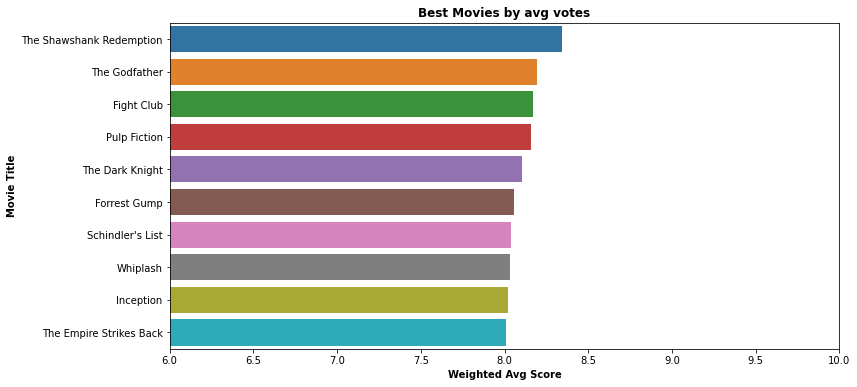

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

Weight_Average = movies_sorted_ranking.sort_values('Weighted_Average', ascending = False)
plt.figure(figsize = (12,6))
axis1 = sns.barplot(x = Weight_Average['Weighted_Average'].head(10), y = Weight_Average['original_title'].head(10))
plt.xlim(6,10)
plt.title('Best Movies by avg votes', weight = 'bold')
plt.xlabel('Weighted Avg Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')
plt.savefig('best_movies.png')

In [70]:
movies_sorted_ranking[movies_sorted_ranking['original_title'] == 'Paycheck']

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,Weighted_Average
732,60000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",9620,"[{""id"": 530, ""name"": ""prophecy""}, {""id"": 5721,...",en,Paycheck,Michael Jennings is a genius who's hired – and...,29.018826,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2003-12-25,96269812,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Remember the future.,5.9,581,"[{""cast_id"": 7, ""character"": ""Jennings"", ""cred...","[{""credit_id"": ""52fe4512c3a36847f80bac4d"", ""de...",5.996086


In [71]:
movies_sorted_ranking[movies_sorted_ranking['original_title'] == 'Night of the Living Dead']

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,Weighted_Average
3737,114000,"[{""id"": 27, ""name"": ""Horror""}]",10331,"[{""id"": 1155, ""name"": ""brother sister relation...",en,Night of the Living Dead,A group of people try to survive an attack of ...,25.666029,"[{""name"": ""Laurel Group"", ""id"": 638}, {""name"":...",1968-10-01,30000000,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","If it doesn't scare you, you're already dead!",7.5,580,"[{""cast_id"": 10, ""character"": ""Ben"", ""credit_i...","[{""credit_id"": ""52fe435b9251416c7500d323"", ""de...",6.795479


In [83]:
movies_sorted_ranking[movies_sorted_ranking['Weighted_Average'] <= 6.5].head(10)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,Weighted_Average
1169,40000000,"[{""id"": 18, ""name"": ""Drama""}]",109410,"[{""id"": 1480, ""name"": ""baseball""}, {""id"": 5565...",en,42,"The powerful story of Jackie Robinson, the leg...",31.884559,"[{""name"": ""Warner Bros."", ""id"": 6194}]",2013-04-12,95020213,128.0,[],The True Story Of An American Legend,6.8,787,"[{""cast_id"": 19, ""character"": ""Jackie Robinson...","[{""credit_id"": ""5609cc74c3a368681700089a"", ""de...",6.499380
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",254,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...",2005-12-14,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The eighth wonder of the world.,6.6,2337,"[{""cast_id"": 5, ""character"": ""Ann Darrow"", ""cr...","[{""credit_id"": ""52fe422ec3a36847f800a1d7"", ""de...",6.498887
360,75000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",2253,"[{""id"": 220, ""name"": ""berlin""}, {""id"": 236, ""n...",en,Valkyrie,"Wounded in Africa during World War II, Nazi Co...",38.832842,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",2008-12-25,200276000,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Many saw evil. They dared to stop it.,6.7,1173,"[{""cast_id"": 8, ""character"": ""Claus Schenk Gra...","[{""credit_id"": ""538319b20e0a2657cd004f23"", ""de...",6.498661
260,110000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",80274,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Ender's Game,Based on the classic novel by Orson Scott Card...,45.948340,"[{""name"": ""Summit Entertainment"", ""id"": 491}, ...",2013-10-23,125537191,114.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",This is not a game.,6.6,2303,"[{""cast_id"": 1, ""character"": ""Ender Wiggin"", ""...","[{""credit_id"": ""52fe47b39251416c91072d5f"", ""de...",6.497695
1535,31000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",10559,"[{""id"": 242, ""name"": ""new york""}, {""id"": 456, ...",en,Frequency,When a rare phenomenon gives police officer Jo...,19.258041,"[{""name"": ""New Line Cinema"", ""id"": 12}]",2000-04-28,68106245,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The future is listening.,7.0,462,"[{""cast_id"": 20, ""character"": ""Frank Sullivan""...","[{""credit_id"": ""52fe43879251416c75013ffb"", ""de...",6.494297
860,55000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",42297,"[{""id"": 4344, ""name"": ""musical""}, {""id"": 12670...",en,Burlesque,The Burlesque Lounge has its best days behind ...,22.863516,"[{""name"": ""Bedford Falls Productions"", ""id"": 3...",2010-11-23,89519773,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",It takes a legend... to make a star,6.9,573,"[{""cast_id"": 1, ""character"": ""Tess"", ""credit_i...","[{""credit_id"": ""58eb3efcc3a3684aa4072ff0"", ""de...",6.493286
3271,8000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",291270,"[{""id"": 572, ""name"": ""sex""}, {""id"": 894, ""name...",en,Anomalisa,A man crippled by the mundanity of his life ex...,21.024346,"[{""name"": ""Starburns Industries"", ""id"": 32542}]",2015-12-30,5659286,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",NaN,7.0,459,"[{""cast_id"": 4, ""character"": ""Michael Stone (v...","[{""credit_id"": ""540de3f3c3a36879ab005ca6"", ""de...",6.492838
449,80000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",20504,"[{""id"": 3096, ""name"": ""book""}, {""id"": 4458, ""n...",en,The Book of Eli,"A post-apocalyptic tale, in which a lone man f...",32.363538,"[{""name"": ""Alcon Entertainment"", ""id"": 1088}, ...",2010-01-14,157107755,118.0,"[{""is

In [72]:
top_500 = movies_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'Weighted_Average', 'popularity']].head(500)

In [74]:
top_500[top_500['original_title'] == 'Paycheck']

,original_title,vote_count,vote_average,Weighted_Average,popularity


In [75]:
movies_sorted_popularity = tmdb_combined_df_cleaned.sort_values('popularity', ascending = False)

In [77]:
movies_sorted_popularity.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,Weighted_Average
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.365286
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.998100


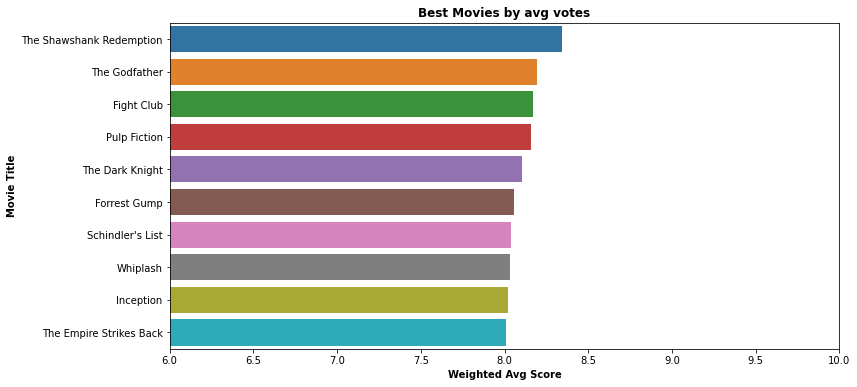

In [78]:
plt.figure(figsize = (12,6))
axis1 = sns.barplot(x = movies_sorted_ranking['Weighted_Average'].head(10), y = movies_sorted_ranking['original_title'].head(10))
plt.xlim(6,10)
plt.title('Best Movies by avg votes', weight = 'bold')
plt.xlabel('Weighted Avg Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')
plt.savefig('best_movies.png')

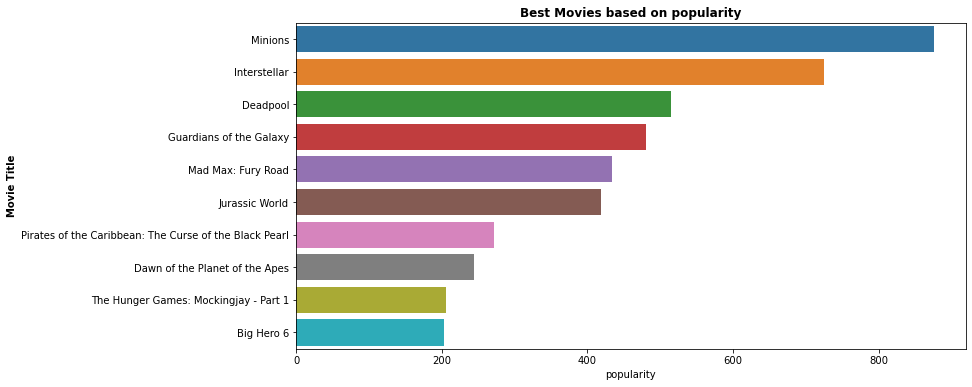

In [80]:
plt.figure(figsize = (12,6))
axis1 = sns.barplot(x = movies_sorted_popularity['popularity'].head(10), y = movies_sorted_popularity['original_title'].head(10))
plt.title('Best Movies based on popularity', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')
plt.savefig('best_movies.png')

In [85]:
movies_sorted_popularity[['popularity', 'vote_count']]

,popularity,vote_count
546,875.581305,4571
95,724.247784,10867
788,514.569956,10995
94,481.098624,9742
127,434.278564,9427
...,...,...
4625,0.001389,0
4118,0.001186,0
4727,0.001117,8
3361,0.000372,3


## Recommendation based on scaled weighted and popularity score (50% both)

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaling = MinMaxScaler()
movie_scaled_df = scaling.fit_transform(tmdb_combined_df_cleaned[['Weighted_Average', 'popularity']])
movie_normalized_df = pd.DataFrame(movie_scaled_df, columns = ['Weighted_Average', 'popularity'])
movie_normalized_df.head(6)

,Weighted_Average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169
5,0.340926,0.132141


In [90]:
tmdb_combined_df_cleaned[['normalized_weighted_avg', 'normalized_popularity']] = movie_normalized_df

In [92]:
tmdb_combined_df_cleaned.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,Weighted_Average,normalized_weighted_avg,normalized_popularity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148013,0.674339,0.171815
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807627,0.581403,0.158846


In [93]:
tmdb_combined_df_cleaned['score'] = tmdb_combined_df_cleaned['normalized_weighted_avg']*0.5 + tmdb_combined_df_cleaned['normalized_popularity']*0.5

In [95]:
tmdb_combined_df_cleaned.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,spoken_languages,tagline,vote_average,vote_count,cast,crew,Weighted_Average,normalized_weighted_avg,normalized_popularity,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148013,0.674339,0.171815,0.423077
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807627,0.581403,0.158846,0.370124


In [99]:
movies_sorted_scores = tmdb_combined_df_cleaned.sort_values(['score'], ascending = False)

In [100]:
movies_sorted_scores.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,spoken_languages,tagline,vote_average,vote_count,cast,crew,Weighted_Average,normalized_weighted_avg,normalized_popularity,score
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.998100,0.906439,0.827162,0.866801
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.365286,0.460630,1.000000,0.730315


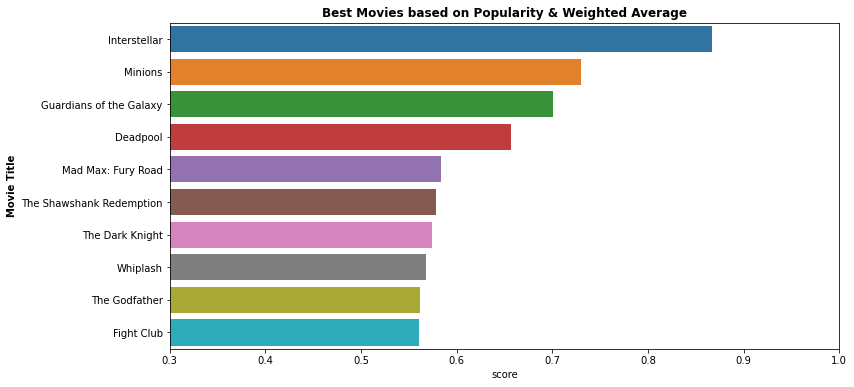

In [106]:
plt.figure(figsize = (12,6))
axis1 = sns.barplot(x = movies_sorted_scores['score'].head(10), y = movies_sorted_scores['original_title'].head(10))
plt.title('Best Movies based on Popularity & Weighted Average', weight = 'bold')
plt.xlim(0.3,1.0)
plt.ylabel('Movie Title', weight = 'bold')
plt.savefig('best_movies.png')

## Content Based Recommendation System

In [109]:
tmdb_combined_df_cleaned.head(1)['overview']

0    In the 22nd century, a paraplegic Marine is di...
Name: overview, dtype: object

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [112]:
#Using Abhishek Thakur's arguments for TF-IDF
tfv = TfidfVectorizer(min_df = 3, max_features = None, strip_accents = 'unicode',
                     analyzer = 'word', token_pattern = r'\w{1,}',
                     ngram_range = (1,3), stop_words = 'english')

# Filling NaNs with empty string
tmdb_combined_df_cleaned['overview'] = tmdb_combined_df_cleaned['overview'].fillna('')

In [124]:
tmdb_combined_df_cleaned['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

In [113]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(tmdb_combined_df_cleaned['overview'])

In [114]:
tfv_matrix.shape

(4803, 10417)

In [125]:
print(tfv_matrix)

  (0, 148)	0.3091311403250014
  (0, 1670)	0.2781519888709605
  (0, 431)	0.2108476222845202
  (0, 7055)	0.26867652924731417
  (0, 6447)	0.25667782792456906
  (0, 3582)	0.21788257757629861
  (0, 9393)	0.24144219475319859
  (0, 5907)	0.17992707015426695
  (0, 9717)	0.24435395917916744
  (0, 6543)	0.2959108637414298
  (0, 5972)	0.2747332388389473
  (0, 2634)	0.2818968058308858
  (0, 5658)	0.2610479764815685
  (0, 1514)	0.20118856027389756
  (0, 147)	0.3091311403250014
  (1, 1810)	0.36793229072333994
  (1, 7159)	0.3031029042939378
  (1, 2916)	0.30082125582474917
  (1, 9609)	0.3355175975086389
  (1, 2848)	0.21556897928560054
  (1, 2872)	0.3232482593626707
  (1, 4205)	0.30803003793564465
  (1, 5263)	0.1333016217342793
  (1, 1806)	0.2104623271234315
  (1, 2318)	0.21892404835497967
  :	:
  (4802, 671)	0.15980375315748296
  (4802, 2360)	0.15010502652571864
  (4802, 677)	0.1348896650905315
  (4802, 3736)	0.14859055527694667
  (4802, 3480)	0.14340155530934393
  (4802, 1252)	0.1517317799962251
  (4

In [115]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [120]:
sig[:2]

array([[0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76163447, 0.76159416, ..., 0.76159513, 0.76159416,
        0.76159416]])

In [127]:
sig.shape

(4803, 4803)

In [129]:
sig[4799]

array([0.76159416, 0.76159416, 0.76159438, ..., 0.76159432, 0.76159416,
       0.76159478])

In [121]:
# Reverse mapping of indices and movie titles
indices = pd.Series(tmdb_combined_df_cleaned.index, index = tmdb_combined_df_cleaned['original_title'])

In [122]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [123]:
def give_rec(title, sig = sig):
    idx = indices['title']
    
    #Get pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))
    
    #sort the movies
    sig_scores = sorted(sig_scores, key = lambda x:x[1], reverse = True)
    
    #top 10
    sig_scores = sig_scores[1:11]
    
    #Movie indices
    movie_indices = [i[0] for i in sig_scores]
    
    # Top 10 most similar movies
    return tmdb_combined_df_cleaned['original_title'].iloc[movie_indices]

In [132]:
give_rec(title = 'Newlyweds')

KeyError: 'title'

In [134]:
movies_df = pd.read_csv('movies.csv', usecols = ['movieId', 'title'], dtype = {'movieId': 'int32', 'title':'str'})
rating_df = pd.read_csv('ratings.csv', usecols = ['userId', 'movieId', 'rating'],
                       dtype = {'userId':'int32', 'movieId':'int32', 'rating':'float32'})

In [135]:
movies_df.head(5)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [137]:
rating_df.head(5)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [139]:
df = pd.merge(rating_df, movies_df, on = 'movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int32  
 1   movieId  100836 non-null  int32  
 2   rating   100836 non-null  float32
 3   title    100836 non-null  object 
dtypes: float32(1), int32(2), object(1)
memory usage: 2.7+ MB


In [141]:
df.shape

(100836, 4)

In [153]:
## Count the number of times a movie got ratings

In [154]:
## Here, for the movie - Toy Story, we can see that we got 
## 215 ratings
df[df['title'] == 'Toy Story (1995)']

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
210,606,1,2.5,Toy Story (1995)
211,607,1,4.0,Toy Story (1995)
212,608,1,2.5,Toy Story (1995)
213,609,1,3.0,Toy Story (1995)


In [165]:
## Do the same for every title 
moving_ratingCount = combine_movie_rating.groupby(by = ['title'])['rating'].count().reset_index()
moving_ratingCount       

,title,rating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [170]:
## The values we have in ratings column are not the ratings 
## but the TotalRatingCount, hence we need to rename it 
moving_ratingCount = moving_ratingCount.rename(columns = {'rating': 'totalRatingCount'})
moving_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [188]:
rating_with_totalRatingCount = df.merge(moving_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [189]:
rating_with_totalRatingCount.shape

(100836, 5)

In [182]:
## To get 3 digits after decimal
pd.set_option('display.float_format', lambda x: '%.3f' %x)
print(moving_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [185]:
## Popularity must be atleast 50
popularity_threshold = 50
rating_popular_movie = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [187]:
rating_popular_movie.shape

(41362, 5)

In [190]:
## First lets create a Pivot matrix

movie_features_df = rating_popular_movie.pivot_table(index = 'title', columns = 'userId', values = 'rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


In [191]:
from scipy.sparse import csr_matrix

movie_features_df_matrx = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fir(movie_features_df_matrx)

AttributeError: 'NearestNeighbors' object has no attribute 'fir'

In [ ]:
movie_features_df.shape

In [ ]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
movie_features_df.head()